<a href="https://colab.research.google.com/github/pranali-kirolkar/MSCPROJECT/blob/main/Visualization_%2B_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
#importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()
from pylab import rcParams
from collections import Counter, defaultdict
import plotly.graph_objects as go
import re
print("LIBRARIES LOADED")

LIBRARIES LOADED


In [ ]:
#Sales of Summer clothes Dataset
Dataset = pd.read_csv('/content/SalesSummerClothes.csv') 

In [ ]:
Dataset.drop('Timestamp',axis=1,inplace=True)

In [ ]:
Dataset.drop('Name', axis=1, inplace=True)

In [ ]:
Dataset.head()

,Age,Buy_Clothes,Type_Clothes,Brand_Clothes,Price,time_prefer,prefer_purchasing,compare_prices,worst_experience,Rating
0,18-25,Occasionally,"Jeans,Women Dress,Ladies Tops","NIKE,Adidas",500-700,During the sales,Online,YES,No,4
1,18-25,Occasionally,"T-shirt,Jeans","NIKE,Adidas,H&M",700-1000,During the sales,Online,YES,Yes,3
2,18-25,Occasionally,"T-shirt,Jeans,Women Dress,Casual Dress,Ladies ...","NIKE,Adidas,H&M,ZARA",200-500,During the sales,By them in Store,YES,Yes,3
3,18-25,Occasionally,Women Dress,NIKE,500-700,During the sales,By them in Store,YES,Yes,4
4,18-25,Occasionally,Women Dress,Meesho,500-700,Without the sales (Off Season),Online,YES,No,5


In [ ]:
Dataset.tail()

,Age,Buy_Clothes,Type_Clothes,Brand_Clothes,Price,time_prefer,prefer_purchasing,compare_prices,worst_experience,Rating
197,18-25,Occasionally,Casual Dress,H&M,500-700,During the sales,By them in Store,YES,No,4
198,18-25,Regularly,"Women Dress,Casual Dress,Ladies Tops","Adidas,H&M",1000-above,During the sales,By them in Store,YES,No,4
199,18-25,Regularly,"T-shirt,Jeans,Ladies Tops",Adidas,700-1000,During the sales,By them in Store,YES,No,4
200,18-25,Occasionally,"T-shirt,Jeans",Adidas,700-1000,Without the sales (Off Season),By them in Store,NO,No,4
201,35-50,Occasionally,"Women Dress,Casual Dress","H&M,ZARA",700-1000,During the sales,By them in Store,YES,Yes,4


In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 202 non-null    object
 1   Buy_Clothes         202 non-null    object
 2   Type_Clothes        202 non-null    object
 3   Brand_Clothes       202 non-null    object
 4   Price               202 non-null    object
 5   time_prefer         202 non-null    object
 6   prefer_purchasing   202 non-null    object
 7   compare_prices      202 non-null    object
 8   worst_experience    202 non-null    object
 9   Rating              202 non-null    int64 
dtypes: int64(1), object(9)
memory usage: 15.9+ KB


In [ ]:
#Check the number of rows and columns
rows,columns=Dataset.shape
print('Number of rows: ',rows)
print('Number of columns: ',columns)

Number of rows:  202
Number of columns:  10


In [ ]:
Dataset.dtypes

Age                   object
Buy_Clothes           object
Type_Clothes          object
Brand_Clothes         object
Price                 object
time_prefer           object
prefer_purchasing     object
compare_prices        object
worst_experience      object
Rating                 int64
dtype: object

In [ ]:
Dataset.describe()

,Rating
count,202.000000
mean,4.292079
std,0.880319
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
missing

Rating                0
worst_experience      0
compare_prices        0
prefer_purchasing     0
time_prefer           0
Price                 0
Brand_Clothes         0
Type_Clothes          0
Buy_Clothes           0
Age                   0
dtype: int64

In [ ]:
Dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
197    False
198    False
199    False
200    False
201    False
Length: 202, dtype: bool

In [ ]:
Dataset['compare_prices '].value_counts()

YES    184
NO      18
Name: compare_prices , dtype: int64

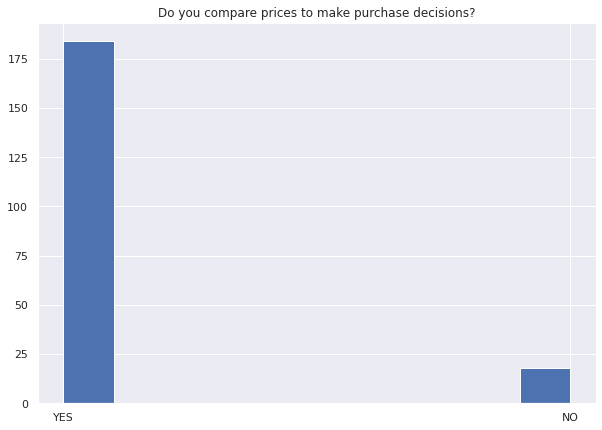

In [ ]:
fig = plt.figure(figsize = (10,7))
Dataset['compare_prices '].hist(bins =10);
plt.title("Do you compare prices to make purchase decisions?")
plt.show()

In [ ]:
Dataset['prefer_purchasing '].value_counts()

By them in Store    107
Online               95
Name: prefer_purchasing , dtype: int64

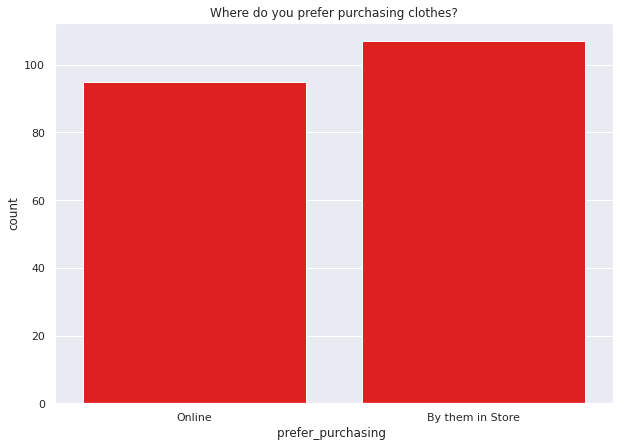

In [ ]:
fig = plt.figure(figsize = (10,7));
sns.countplot(data=Dataset , x = 'prefer_purchasing ', color = 'Red');
plt.title("Where do you prefer purchasing clothes?")
plt.show()

In [ ]:
Dataset['time_prefer '].value_counts()

During the sales                  154
Without the sales (Off Season)     48
Name: time_prefer , dtype: int64

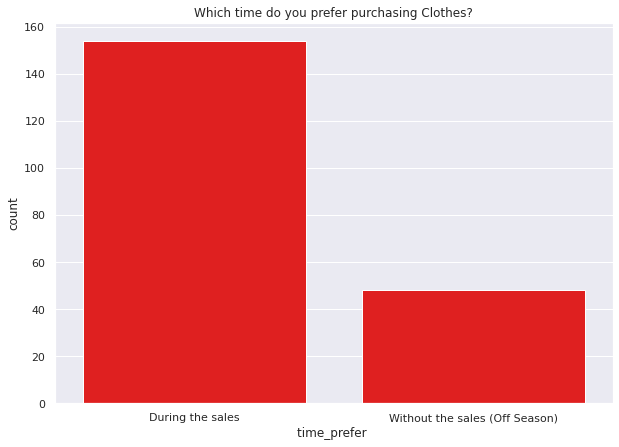

In [ ]:
fig = plt.figure(figsize = (10,7));
sns.countplot(data=Dataset , x = 'time_prefer ', color = 'Red');
plt.title("Which time do you prefer purchasing Clothes?")
plt.show()

In [ ]:
Dataset['Brand_Clothes'].nunique()

45

In [ ]:
def split_multicolumn(Brand_Clothes):
    result_df = Brand_Clothes.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in Brand_Clothes[Brand_Clothes.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [ ]:
Brand_df = split_multicolumn(Dataset.Brand_Clothes)
Brand_split = Brand_df.sum().sort_values(ascending=False)

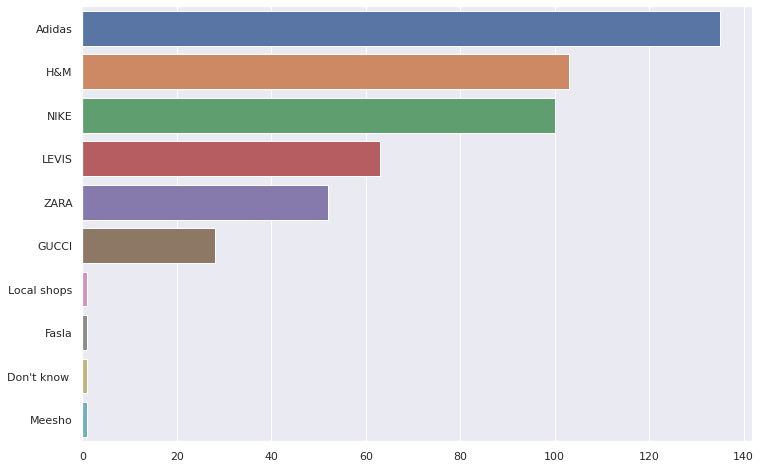

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=Brand_split.values, y=Brand_split.index);

In [ ]:
Dataset['Type_Clothes'].nunique()

29

In [ ]:
def split_multicolumn(Type_Clothes):
    result_df = Type_Clothes.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in Type_Clothes[Type_Clothes.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [ ]:
Type_df = split_multicolumn(Dataset.Type_Clothes)
Type_split = Type_df.sum().sort_values(ascending=False)

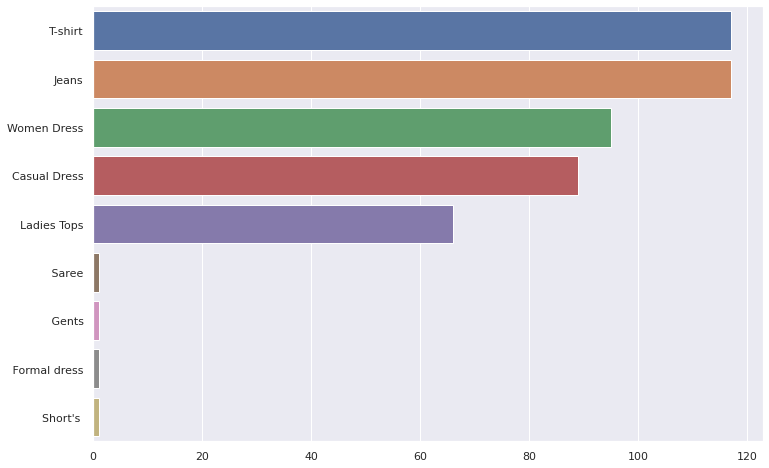

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=Type_split.values, y=Type_split.index);

In [ ]:
Dataset['prefer_purchasing '].nunique()

2

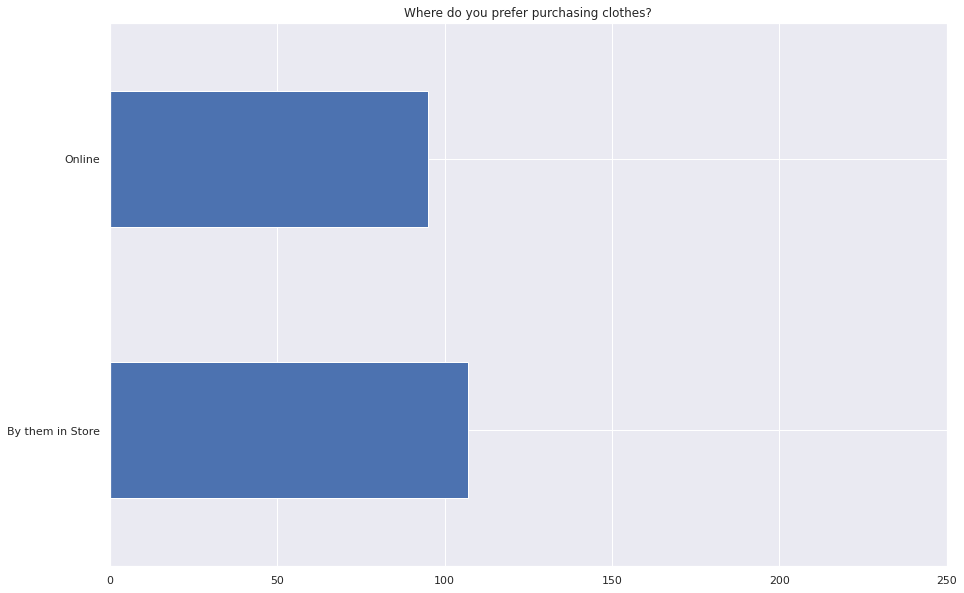

In [ ]:
Dataset['prefer_purchasing '].value_counts().plot(kind='barh',figsize=(15,10))
plt.title("Where do you prefer purchasing clothes?")
plt.xlim(0,250)
plt.show()

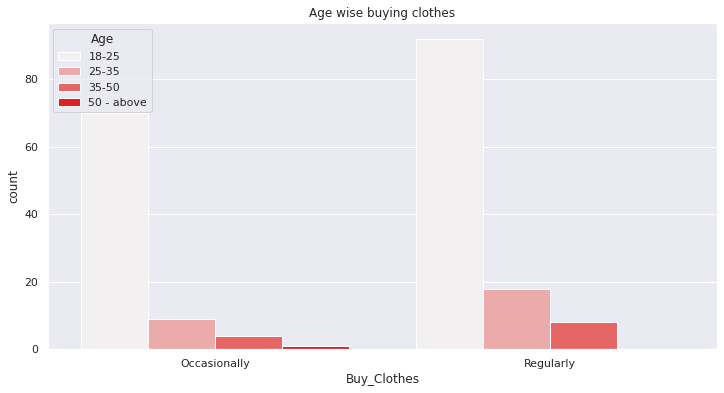

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Buy_Clothes', hue = 'Age',data=Dataset, color = 'red')
plt.title("Age wise buying clothes")
plt.show()

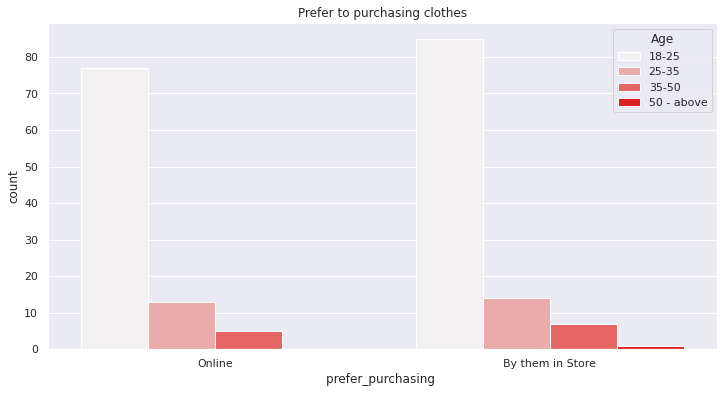

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='prefer_purchasing ', hue = 'Age',data=Dataset, color = 'red')
plt.title("Prefer to purchasing clothes")
plt.show()

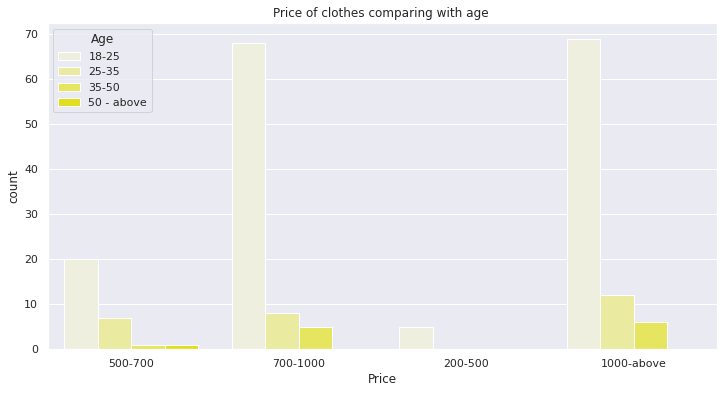

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Price', hue = 'Age',data=Dataset, color = 'yellow')
plt.title("Price of clothes comparing with age ")
plt.show()

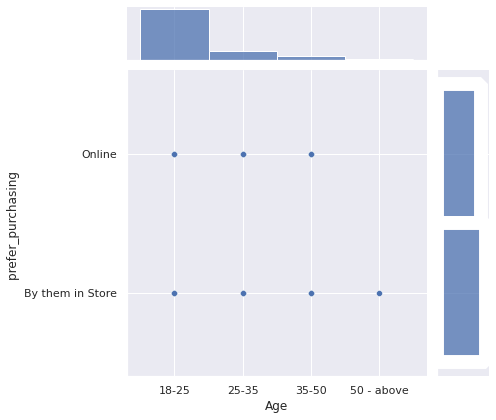

In [ ]:
sns.jointplot(data=Dataset, x='Age',y='prefer_purchasing ', kind='scatter');
plt.show()

Find columns which include null values

In [95]:
def find_null(dataFrame):
    total = len(dataFrame.columns)
    n = 0
    for col in dataFrame.columns:
        null_sum = dataFrame[col].isna().sum()
        if null_sum > 0:
            n+=1
            print(f'"{col}": {null_sum} null values')
            
    print('---------------------------------------')
    print(f'\n{n}/{total} columns have null values')

In [96]:
find_null(Dataset)

---------------------------------------

0/10 columns have null values


Age distribution

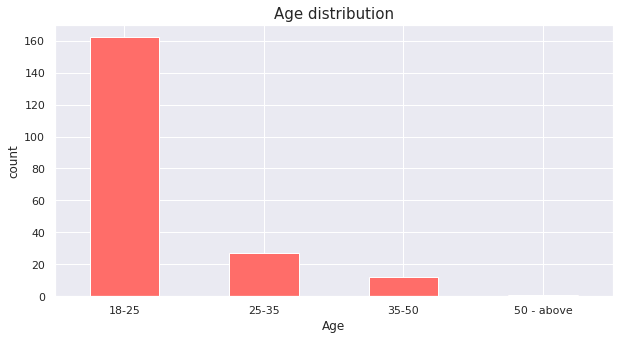

In [ ]:
def count_plot(df, label, color, figsize=(10,5), rotation=0):
    plt.figure(figsize=figsize)
    df[label].value_counts().plot(kind='bar', color=color)
    plt.xlabel(label)
    plt.ylabel('count')
    
    title = label + ' distribution'
    plt.title(title, fontsize=15)
    plt.xticks(rotation=rotation)
    plt.show()    

count_plot(Dataset, 'Age', '#ff6d69')

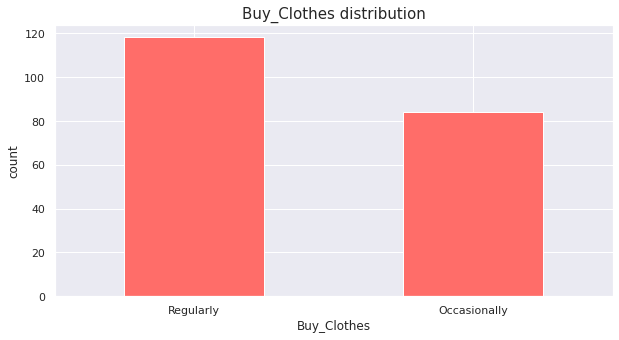

In [ ]:
def count_plot(df, label, color, figsize=(10,5), rotation=0):
    plt.figure(figsize=figsize)
    df[label].value_counts().plot(kind='bar', color=color)
    plt.xlabel(label)
    plt.ylabel('count')
    
    title = label + ' distribution'
    plt.title(title, fontsize=15)
    plt.xticks(rotation=rotation)
    plt.show()    

count_plot(Dataset, 'Buy_Clothes', '#ff6d69')

Rating Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



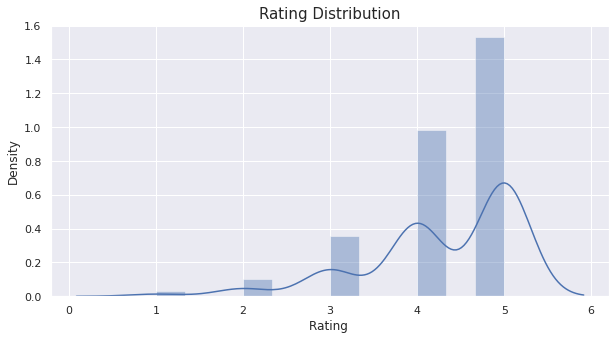

In [ ]:
figsize=(10,5)
sns.distplot(Dataset['Rating ']);
plt.title('Rating Distribution', fontsize=15)
plt.show()

In [91]:
fig = px.scatter(Dataset, x='Price', y='Rating ')
fig.update_layout(title_text="Relationship between retail_price and rating")
fig.show()

In [ ]:
EDA (Exploratory data analysis)

In [94]:
sold = Dataset['Age']
sold_count = dict(Counter(list(sold.values)))
sold_count = {k: v for k,v in sorted(sold_count.items(), key = lambda item : item[0])}

sold_xaxis = list(sold_count.keys())
sold_xaxis = ["Age: " + str(x) for x in sold_xaxis]
sold_yaxis = list(sold_count.values())

fig = go.Figure()
fig.add_trace(go.Bar(y = sold_yaxis, x = sold_xaxis))
fig.update_layout(yaxis_title = "Total Number")
fig.show()

In [108]:
price = Dataset['Price']

fig = go.Figure()
fig.add_trace(go.Box(x = price, name = "Price"))
fig.update_traces(opacity = 0.75)
fig.update_layout(barmode = "overlay", 
                  title = "Distribution of Prices")

In [114]:
price = Dataset['Price']
compare_price = Dataset['compare_prices ']

fig = go.Figure()
fig.add_trace(go.Box(x = price, name = "Price"))
fig.add_trace(go.Box(x = compare_price, name = "compare Price"))
fig.update_traces(opacity = 0.75)
fig.update_layout(barmode = "overlay", 
                  title = "Distribution of  Prices")

In [123]:
diff = price
Dataset['Price'] = diff

fig = go.Figure()
fig.add_trace(go.Histogram(x = diff, marker = dict(color = 'YELLOW')))
fig.update_layout(title = "Prices Distribution")

In [125]:
min(diff)

'1000-above'

In [129]:
groups = list(Dataset['Age'].value_counts().index)
groups.sort()

fig = go.Figure()
for g in groups: 
    subset_df = Dataset[Dataset['Age'] == g]
    subset_x = subset_df['Price']
    set_name = "Age: " + str(g)
    fig.add_trace(go.Box(x = subset_x, name = set_name))

fig.update_layout(title = "Box plot of differences prices over Age")
fig.show()